# Locally Linear Embedding (LLE)

En este cuaderno vamos a ver una técnica de Aprendizaje de variedades (*manifold learning*).

Esta área del ML es muy interesante y requiere de matemáticas que no son frecuentes como la topología.

---
    [ES] Código de Alfredo Cuesta Infante para 'Reconocimiento de Patrones'
       @ Master Universitario en Visión Artificial, 2021, URJC (España)
    [EN] Code by Alfredo Cuesta-Infante for 'Pattern Recognition'
       @ Master of Computer Vision, 2021, URJC (Spain)

    alfredo.cuesta@urjc.es

### Preliminares 

En la siguiente celda se realizan los siguientes pasos:
1. carga de módulos genéricos
2. leer los datos y cargarlos en dataframes
2. extraer características
2. separar en TRAIN y VALID

In [1]:
#-[1]. Load data from CSV and put all in a single dataframe 'FullSet'

import numpy  as np
import pandas as pd
from matplotlib import pyplot as plt
import sys
sys.path.append('../MyUtils/')
import MyUtils as my
seed = 1234 #<- random generator seed (comment to get randomness)

#-[2]. Load data from CSV and put all in a single dataframe 'FullSet'

FullSet_0 = pd.read_csv('../Datasets/1000ceros.csv', header=None)
FullSet_1 = pd.read_csv('../Datasets/1000unos.csv',  header=None)
FullSet = my.join_features_labels(FullSet_0,FullSet_1)

#-[3]. Convert the 'FullSet' of pixels into the set 'X_full' of features and get the set 'Y_full' of labels

theta = 0.5
X_full = my.mnist_features( FullSet.drop('label', axis=1), theta=theta )
Y_full = FullSet[['label']]

#-[4]. Split X_full into TRAIN and TEST in a single Stratified split

valid_size = 0.2
X_train, Y_train, X_valid, Y_valid = \
   my.single_stratified_split( X_full,Y_full, test_size=valid_size, random_state=seed)

#-[5]. Select the features and fit a scaler to [0,1]

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

#feat_selec= ['width','height','W_max1','area','w_vs_h']
#X = scaler.fit_transform(X_train[feat_selec])
X = scaler.fit_transform(X_train)
Y = Y_train.values.ravel()   

#---> X and Y are now numpy arrays ready to train a machine !!

### Reducción de dimensiones con LLE

In [2]:
from sklearn.manifold import LocallyLinearEmbedding

n_components = 3
n_neighbors  = 50
method = "standard"   # options are: "standard", "hessian", "modified" or "ltsa"
neighbors_algorithm = "auto" # options are : "auto", "brute", "kd_tree", "ball_tree"

lle = LocallyLinearEmbedding(n_components = n_components, n_neighbors=n_neighbors,
                             method = method, neighbors_algorithm = neighbors_algorithm)
X_proy = lle.fit_transform(X)


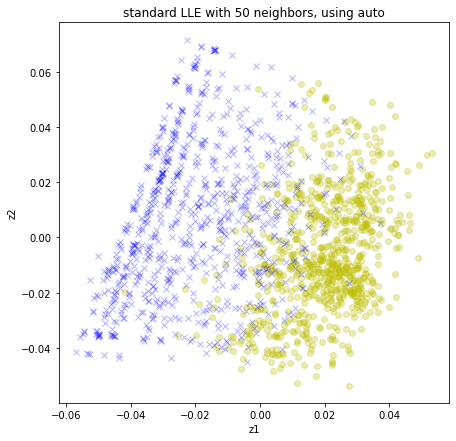

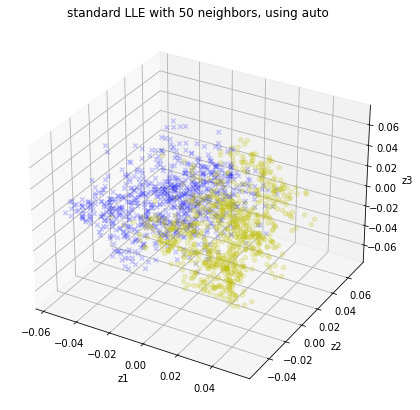

In [3]:
plt.rcParams['figure.figsize'] = [7,7] #<- this makes the figures larger in Jupyter

fig_number = 0
plot_proy2d = True
plot_proy3d = True

if plot_proy2d:
    fig_number=fig_number+1
    plt.figure(fig_number)
    ind0 = Y==0
    ind1 = Y==1
    plt.plot(X_proy[ind0,0],X_proy[ind0,1], 'yo', alpha=.3)
    plt.plot(X_proy[ind1,0],X_proy[ind1,1], 'bx', alpha=.3)
    plt.xlabel('z1')
    plt.ylabel('z2')
    strTitle = "%s LLE with %d neighbors, using %s" %(method, n_neighbors, neighbors_algorithm)
    plt.title(strTitle)

if plot_proy3d:
    from mpl_toolkits.mplot3d import Axes3D
    fig_number=fig_number+1
    fig = plt.figure(fig_number)
    ax = fig.add_subplot(111, projection='3d')
    ind0 = Y==0
    ind1 = Y==1
    ax.scatter(X_proy[ind0,0],X_proy[ind0,1],X_proy[ind0,2], c='y',marker='o', alpha=.2)
    ax.scatter(X_proy[ind1,0],X_proy[ind1,1],X_proy[ind1,2], c='b',marker='x', alpha=.2)
    ax.set_xlabel('z1')
    ax.set_ylabel('z2')
    ax.set_zlabel('z3')
    strTitle = "%s LLE with %d neighbors, using %s" %(method, n_neighbors, neighbors_algorithm)
    plt.title(strTitle)

plt.show()

###  Ejercicio
+ Prueba a aprender un clasificador con los datos proyectados mediante LLE y después evalualo con el conjunto de test que tenemos separado.
+ Recuerda también que el conjunto de test debe ser procesado de la misma manera que lo fué el conjunto de entrenamiento.
+ Compara los resultados con aquellos que obtuviste sin hacer LLE.
+ Compara los resultados con PCA y kernel-PCA